In [1]:
from networkx.readwrite import json_graph
import networkx as nx
import json
import matplotlib.pyplot as plt
import community as community_louvain

In [2]:
with open("/home/c6/Desktop/OpenWPM/jsons/AST/CDX_results/Graphs/2015/Graph.json", 'rt') as gr:
    g = json.load(gr)

In [3]:
G = json_graph.node_link_graph(g)

In [4]:
print(type(G))

<class 'networkx.classes.graph.Graph'>


In [5]:
# Print number of nodes and edges

In [6]:
print("Number of Nodes: ", len(G.nodes()))
print("Number of Edges: ", len(G.edges()))

Number of Nodes:  2071
Number of Edges:  709355


In [7]:
#Degree calculation

In [8]:
for node_temp in G.nodes():
    wt = 0
    deg = 0
    for nbr, eattr in G.adj[node_temp].items():
        wt = wt + eattr['weight']
        deg += 1
    G.nodes[node_temp]['deg_wt'] = wt
    G.nodes[node_temp]['deg'] = deg

In [9]:
#Degree distrivution

Text(0, 0.5, 'Frequency')

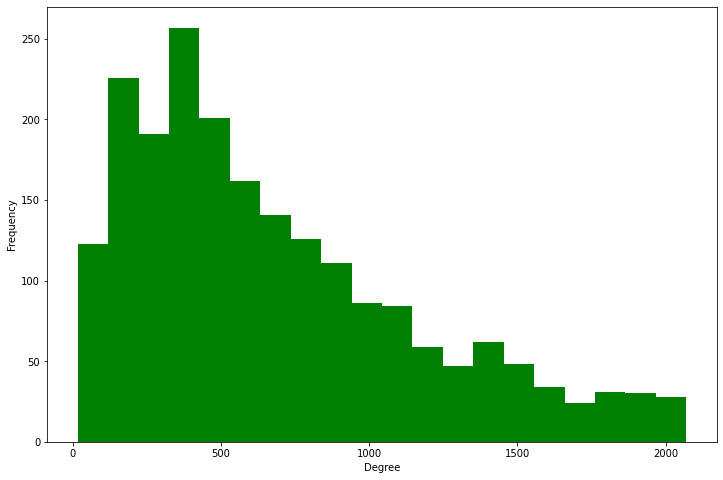

In [10]:
degree_freq = []
for nod in G.nodes:
    degree_freq.append(G.nodes[nod]['deg'])

degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8))
plt.hist(degree_freq, color='green', bins=20)
plt.xlabel('Degree')
plt.ylabel('Frequency')

In [11]:
# Weight Distribution

Text(0, 0.5, 'Frequency')

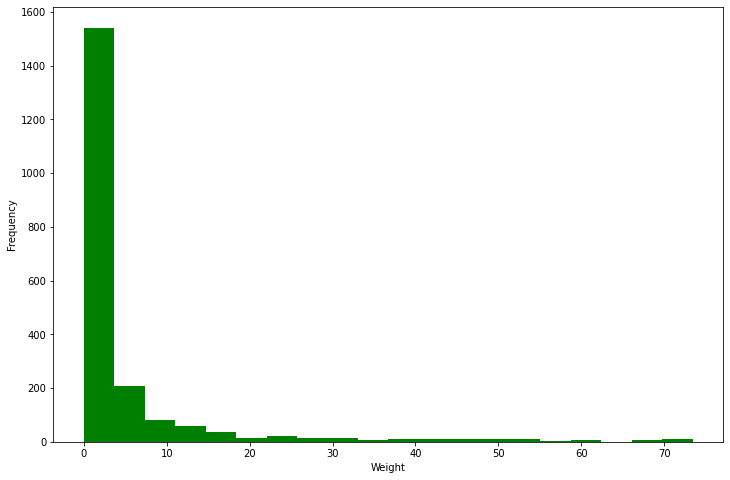

In [12]:
weight_freq = []
for nod in G.nodes:
    weight_freq.append(G.nodes[nod]['deg_wt'])

wt = range(len(weight_freq))
plt.figure(figsize=(12, 8))
plt.hist(weight_freq, color='green', bins=20)
plt.xlabel('Weight')
plt.ylabel('Frequency')

In [13]:
# Degree statistics

In [14]:
# Average degree
print(sum(degree_freq)/len(G.nodes))
print(min(degree_freq))
print(max(degree_freq))

685.036214389184
17
2070


In [15]:
# Weight Statistics
print(sum(weight_freq)/len(G.nodes))
print(min(weight_freq))
print(max(weight_freq))

4.788872145002389
0.001790227464195451
73.43850042122986


In [16]:
# sort nodes based on degree

In [17]:
degree_freq = {}
for nod in G.nodes:
    degree_freq[nod] = G.nodes[nod]['deg']
sorted_degree = dict(sorted(degree_freq.items(), key=lambda item: item[1], reverse=True))
print(sorted_degree)

{'name': 2070, 'document': 2070, 'location': 2070, 'var': 2070, 'window': 2070, 'init': 2063, 'self': 2057, 'parent': 2057, 'frames': 2057, 'top': 2057, 'opener': 2057, 'length': 2054, 'null': 2049, 'push': 2028, 'type': 2027, 'createElement': 2019, 'body': 1999, 'src': 1998, 'replace': 1996, 'id': 1987, 'setTimeout': 1982, 'prototype': 1982, 'navigator': 1981, 'undefined': 1981, 'height': 1981, 'width': 1981, 'Date': 1972, 'addEventListener': 1969, 'call': 1961, 'style': 1960, 'Math': 1957, 'data': 1953, 'toString': 1952, 'true': 1950, 'function': 1943, 'arguments': 1943, 'match': 1941, 'appendChild': 1939, 'string': 1936, 'userAgent': 1924, 'join': 1923, 'load': 1918, 'object': 1916, 'in': 1912, 'href': 1909, 'value': 1908, 'apply': 1908, 'onload': 1906, 'Array': 1899, 'on': 1896, 'slice': 1891, 'readyState': 1889, 'documentElement': 1889, 'complete': 1885, 'delete': 1882, 'setAttribute': 1882, 'hasOwnProperty': 1872, 'parentNode': 1865, 'Object': 1864, 'false': 1862, 'getTime': 1859

In [18]:
# sort nodes based on weight

In [19]:
weight_freq = {}
for nod in G.nodes:
    weight_freq[nod] = G.nodes[nod]['deg_wt']
sorted_weight = dict(sorted(weight_freq.items(), key=lambda item: item[1], reverse=True))
print(sorted_weight)

{'document': 73.43850042122986, 'var': 73.43723673125514, 'window': 73.43628896377408, 'location': 73.41649115416995, 'name': 73.37247262005037, 'top': 73.34688289806213, 'parent': 73.33887952822222, 'self': 73.32382055602339, 'frames': 73.30570766638562, 'opener': 73.29907329401829, 'length': 69.73178180286419, 'src': 68.3114995787699, 'createElement': 67.71609098567775, 'null': 67.66375315922484, 'init': 67.62394692502079, 'type': 62.68607834877909, 'getElementsByTagName': 61.72609519797837, 'push': 61.62373631002586, 'Date': 59.89079612468461, 'appendChild': 59.86615417017736, 'replace': 59.72167228306703, 'parentNode': 57.29454507160946, 'undefined': 55.87605307497937, 'join': 55.66280539174449, 'Math': 54.6972409435557, 'body': 54.681655433867554, 'navigator': 54.23325610783553, 'href': 53.96703875315982, 'id': 53.72609519797875, 'style': 53.570871946083145, 'height': 52.849620893008165, 'true': 52.633213984836324, 'width': 51.69745155855163, 'call': 51.38984835720371, 'toString':

In [20]:
# Check whether the graph is connected

In [21]:
nx.is_connected(G)

True

In [22]:
# Clustering Coefficient

In [23]:
nx.average_clustering(G)

0.8170790292230317

In [24]:
# average_shortest_path_length

In [25]:
nx.average_shortest_path_length(G)

1.6690646307298629

In [26]:
#Lovain methof

In [27]:
partition = community_louvain.best_partition(G, resolution=0.88, weight='weight')

In [28]:
# number of partinions

In [29]:
num_of_partitions = len(set(partition.values()))
print(num_of_partitions)

11


In [30]:
api_hash_fract = {}
for key, value in partition.items():
    api_hash_fract[key] = value
louvain_clusters = {}
for i in range(num_of_partitions):
    clust = []
    for key, value in api_hash_fract.items():
        if value == i:
            clust.append(key)
    louvain_clusters[i] = clust
for i in range(num_of_partitions):
    print(len(louvain_clusters[i]))

75
152
547
742
18
149
133
68
184
1
2


In [31]:
with open("Lovain_clusters.json", 'w') as l:
    json.dump(louvain_clusters,l, indent=4)